# Youtube Streamer Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df = pd.read_csv(r"C:\Data Analysis\Python\Youtube Streamer Analysis Project\youtubers_df (1).csv")
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


# 1. Data Exploration

In [4]:
df.isna()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,True,False,False,False,False,False,False
996,False,False,True,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,True,False,False,False,False,False,False


In [5]:
df.isna().any()

Rank          False
Username      False
Categories     True
Suscribers    False
Country       False
Visits        False
Likes         False
Comments      False
Links         False
dtype: bool

In [6]:
df.isna().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [7]:
df = df.fillna("Unknown")
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknown,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Unknown,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,Unknown,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,Unknown,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [8]:
duplicate_mask = df.duplicated()

In [12]:
df['IsDuplicate'] = duplicate_mask

In [13]:
print("\nDataFrame after removing duplicates:")
df


DataFrame after removing duplicates:


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,IsDuplicate
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,False
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,False
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,False
3,4,SETIndia,Unknown,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,False
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,False
...,...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Unknown,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...,False
996,997,Adaahqueen,Unknown,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...,False
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...,False
998,999,PenMultiplex,Unknown,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...,False


In [16]:
df = df.drop('Links',axis=1)
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,IsDuplicate
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,False
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,False
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,False
3,4,SETIndia,Unknown,162600000.0,India,15600.0,166.0,9.0,False
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,False
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Unknown,11700000.0,Estados Unidos,397400.0,14000.0,124.0,False
996,997,Adaahqueen,Unknown,11700000.0,India,1100000.0,92500.0,164.0,False
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,False
998,999,PenMultiplex,Unknown,11700000.0,India,14000.0,81.0,1.0,False


# Trend Analysis

In [17]:
df.value_counts()

Rank  Username                Categories            Suscribers   Country         Visits      Likes      Comments  IsDuplicate
1     tseries                 Música y baile        249500000.0  India           86200.0     2700.0     78.0      False          1
672   NobruTV                 Películas, Animación  14600000.0   Brasil          367300.0    31300.0    125.0     False          1
659   infobellskannadarhymes  Educación             14700000.0   Unknown         348300.0    8100.0     0.0       False          1
660   ZEE5                    Unknown               14700000.0   India           255.5       8.0        0.0       False          1
661   rebeccazamolo           Videojuegos, Humor    14600000.0   Estados Unidos  2900000.0   30400.0    2600.0    False          1
                                                                                                                                ..
339   PragatiVermaaShorts     Unknown               20500000.0   India           2800000

In [18]:
df['Categories'].mode()

0    Unknown
Name: Categories, dtype: object

In [19]:
df['Categories'].max()

'Vlogs diarios'

In [20]:
df['Categories'].min()

'ASMR'

In [21]:
df['Categories'].value_counts().nlargest()

Categories
Unknown                      306
Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Name: count, dtype: int64

In [23]:
df['Categories'].value_counts().nsmallest()

Categories
Comida y bebida, Juguetes     1
ASMR, Comida y bebida         1
Animación, Humor, Juguetes    1
Diseño/arte, Belleza          1
Belleza, Moda                 1
Name: count, dtype: int64

In [24]:
df['Username'].value_counts()

Username
NickyJamTV             2
mgcplayhouse           2
Family-Box             2
Super_Senya_RU         2
thexoteam              2
                      ..
EmiwayBantai           1
PragatiVermaaShorts    1
Cookieswirlc           1
gottalentglobal        1
OneindiaHindi          1
Name: count, Length: 994, dtype: int64

In [25]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,IsDuplicate
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,False
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,False
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,False
3,4,SETIndia,Unknown,162600000.0,India,15600.0,166.0,9.0,False
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,False


In [26]:
df.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,IsDuplicate
995,996,hamzymukbang,Unknown,11700000.0,Estados Unidos,397400.0,14000.0,124.0,False
996,997,Adaahqueen,Unknown,11700000.0,India,1100000.0,92500.0,164.0,False
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,False
998,999,PenMultiplex,Unknown,11700000.0,India,14000.0,81.0,1.0,False
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0,False


In [28]:
correlation = df['Suscribers'].corr(df['Likes'])
correlation

0.21163868368008348

In [29]:
correlation = df['Suscribers'].corr(df['Comments'])
correlation

0.03634982616105394

In [33]:
top_streamers = df.sort_values(by='Suscribers',ascending=False).head()
top_streamers

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,IsDuplicate
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,False
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,False
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,False
3,4,SETIndia,Unknown,162600000.0,India,15600.0,166.0,9.0,False
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,False


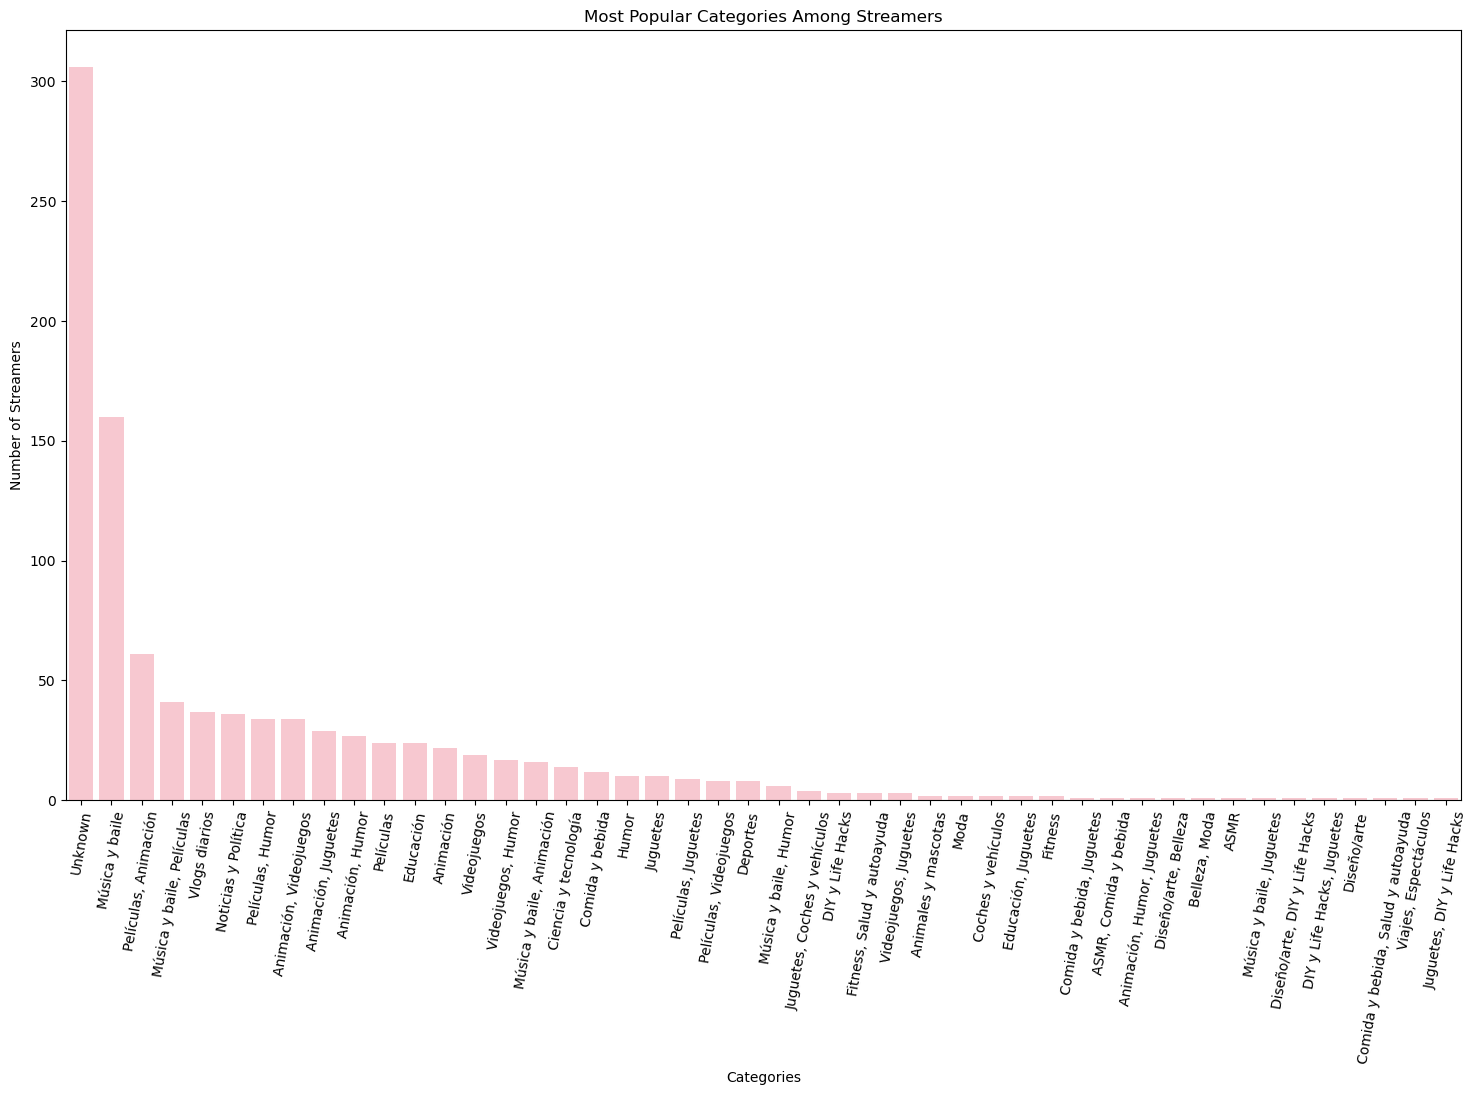

In [51]:
category_counts = df['Categories'].value_counts()
plt.figure(figsize=(18,10))
sns.barplot(x=category_counts.index, y =category_counts.values, color='Pink')
plt.title("Most Popular Categories Among Streamers")
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=80)
plt.show()

In [52]:
correlation_likes = df['Suscribers'].corr(df['Likes'])
correlation_comments = df['Suscribers'].corr(df['Comments'])

print(f'Correlation between Subscribers and Likes: {correlation_likes:.3f}')
print(f'Correlation between Subscribers and Comments: {correlation_comments:.3f}')

Correlation between Subscribers and Likes: 0.212
Correlation between Subscribers and Comments: 0.036


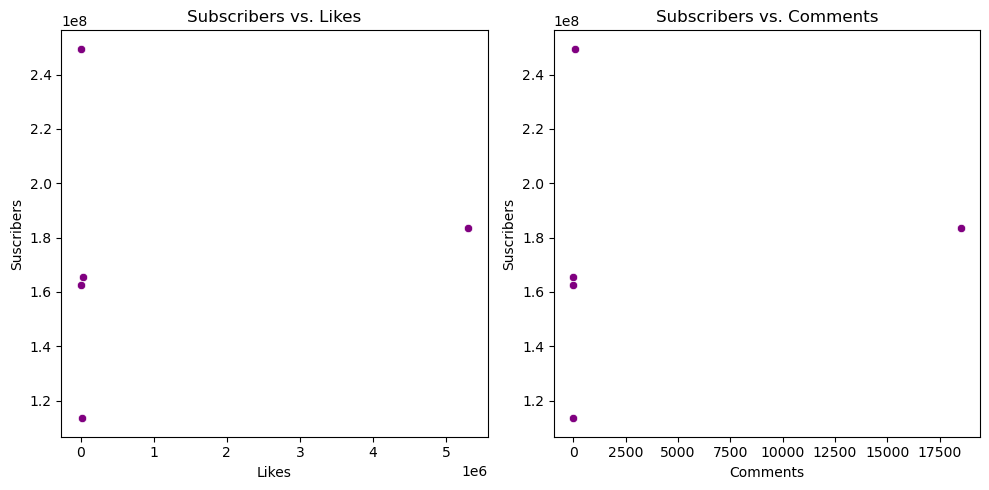

In [55]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=top_streamers, y='Suscribers', x='Likes', color = 'Purple')
plt.title('Subscribers vs. Likes')

plt.subplot(1, 2, 2)
sns.scatterplot(data=top_streamers, y='Suscribers', x='Comments', color = 'Purple')
plt.title('Subscribers vs. Comments')

plt.tight_layout()
plt.show()

# Audience Study

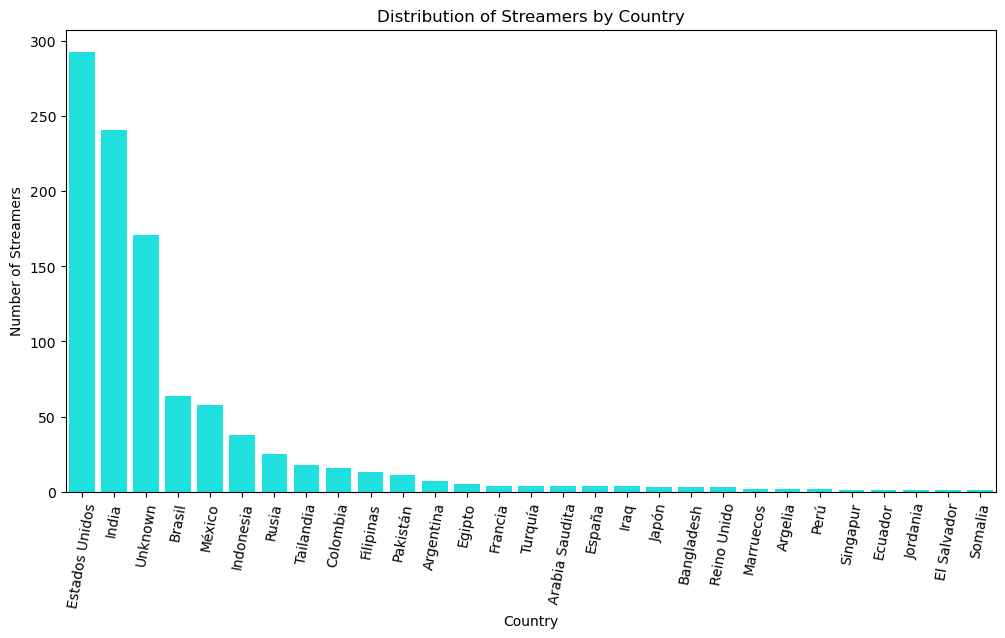

In [59]:
country_counts=df['Country'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.index, y =country_counts.values, color = 'Aqua')
plt.title("Distribution of Streamers by Country")
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=80)
plt.show()

In [62]:
category_counts=df.groupby(['Country','Categories'])['Username'].count().unstack().fillna(0)

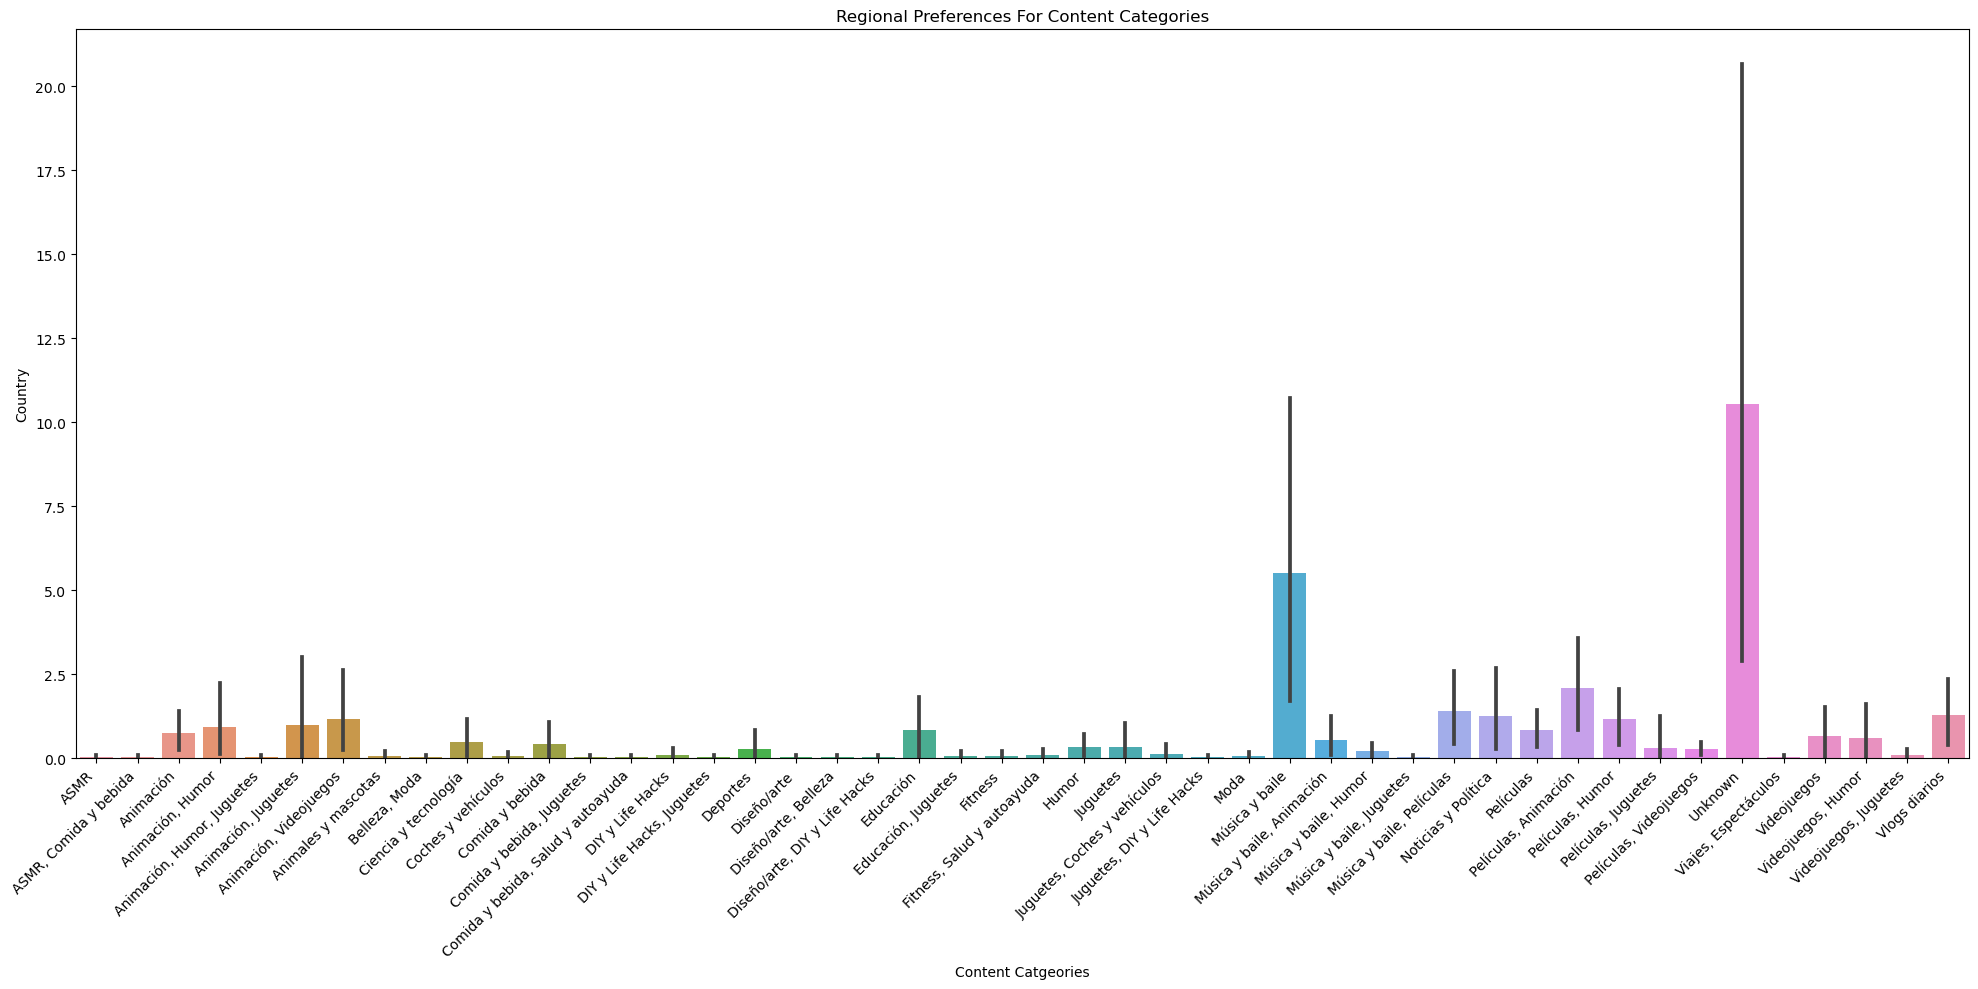

In [76]:
plt.figure(figsize=(20,10))
sns.barplot(category_counts)
plt.title('Regional Preferences For Content Categories')
plt.xlabel('Content Catgeories')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

# 4. Prformance Metrics

In [77]:
average_subscribers = df['Suscribers'].mean()
average_visits = df['Visits'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

print(f"Average Subscribers: {average_subscribers}")
print(f"Average Visits: {average_visits}")
print(f"Average Likes: {average_likes}")
print(f"Average Comments: {average_comments}")

Average Subscribers: 21894400.0
Average Visits: 1209446.3155
Average Likes: 53632.592
Average Comments: 1288.768


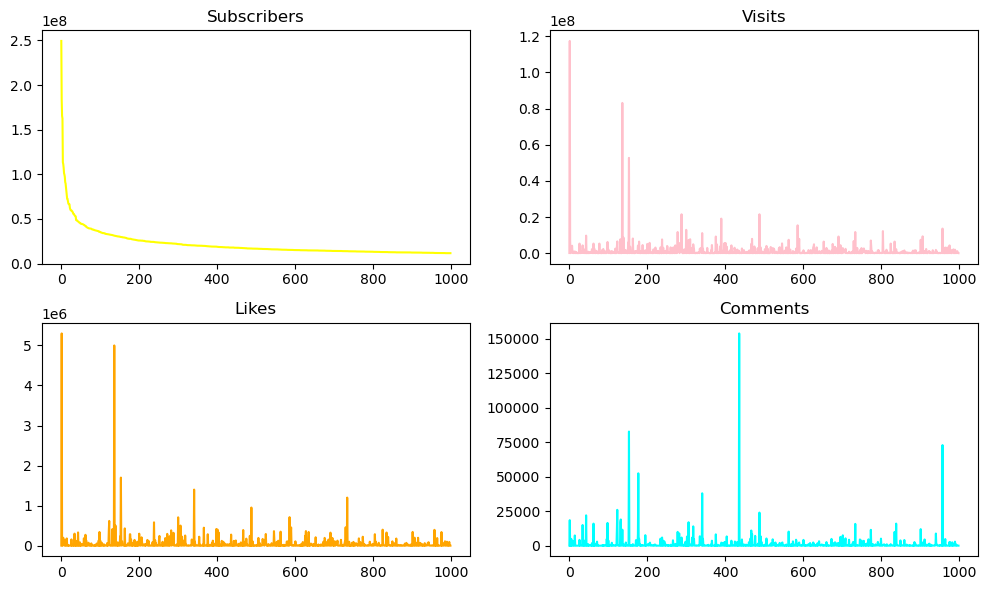

In [78]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

#Subscribers
plt.subplot(2, 2, 1)
plt.plot( df['Suscribers'], color='yellow')
plt.title('Subscribers')

# Visits
plt.subplot(2, 2, 2)
plt.plot( df['Visits'], color='pink')
plt.title('Visits')

#Likes
plt.subplot(2, 2, 3)
plt.plot( df['Likes'], color='orange')
plt.title('Likes')

# Comments
plt.subplot(2, 2, 4)
plt.plot( df['Comments'], color='aqua')
plt.title('Comments')

plt.tight_layout()
plt.show()


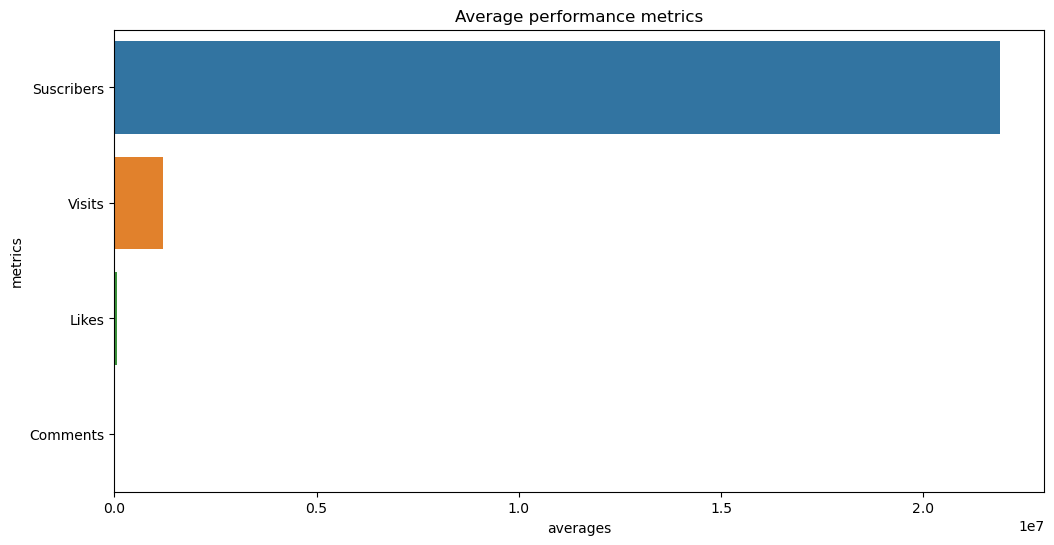

In [89]:
metrics = ['Suscribers','Visits','Likes','Comments']
averages = [average_subscribers, average_visits, average_likes, average_comments]
plt.figure(figsize=(12,6))
sns.barplot(x=averages, y =metrics)
plt.title("Average performance metrics")
plt.xlabel('averages')
plt.ylabel('metrics')
plt.xticks(rotation=360)
plt.show()

# 5. Content Categories

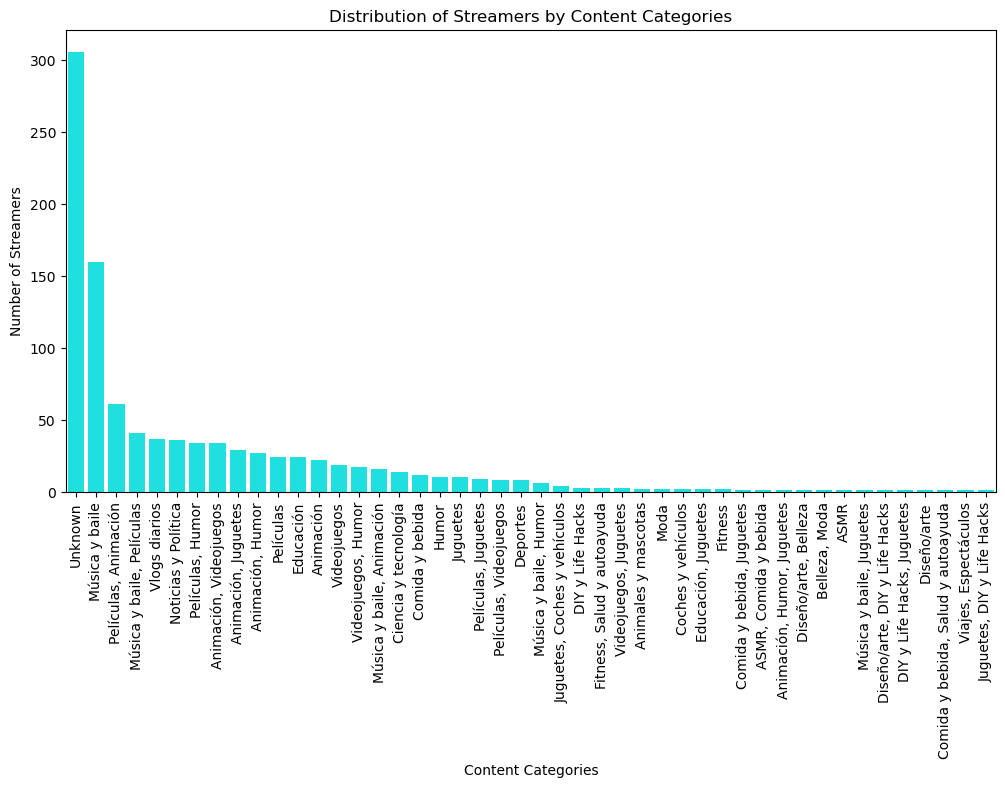

In [92]:
category_counts = df['Categories'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, color='aqua')
plt.title('Distribution of Streamers by Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

category_counts = df['Categories'].value_counts()
threshold = 50
exceptional_categories = category_counts[category_counts > threshold]

print("Categories with Exceptional Performance:")
print(exceptional_categories)

Categories with Exceptional Performance:
Categories
Unknown                 306
Música y baile          160
Películas, Animación     61
Name: count, dtype: int64


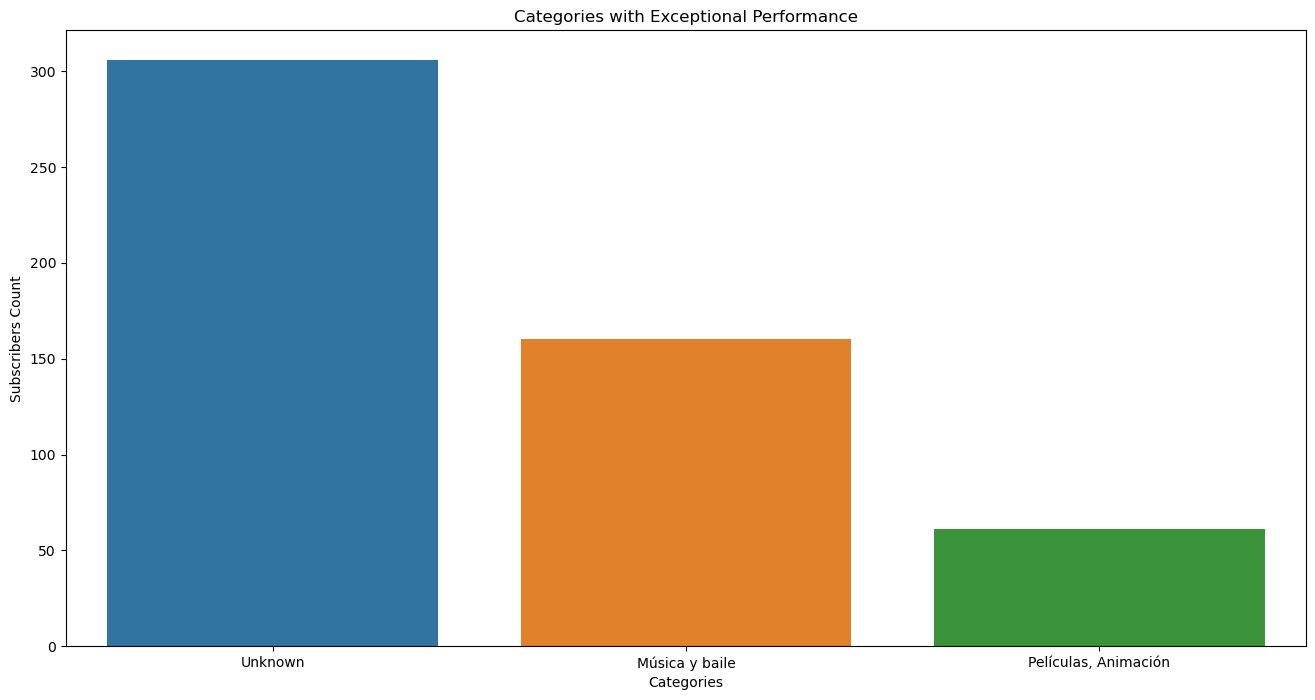

In [108]:
plt.figure(figsize=(16, 8))
sns.barplot(x=exceptional_categories.index, y=exceptional_categories.values)
plt.title('Categories with Exceptional Performance')
plt.xlabel('Categories')
plt.ylabel('Subscribers Count')
plt.show()

In [113]:
for metric in performance_metrics:
    z_scores = (df[metric] - df[metric].mean()) / df[metric].std()  
    exceptional_categories = df[z_scores.abs() > 2]['Categories'].unique()
    print(f'Exceptional Categories for {metric.capitalize()}: {", ".join(exceptional_categories)}')


Exceptional Categories for Suscribers: Música y baile, Videojuegos, Humor, Educación, Unknown, Animación, Juguetes, Películas, Videojuegos, Juguetes, Videojuegos, Películas, Animación, Películas, Noticias y Política
Exceptional Categories for Likes: Videojuegos, Humor, Unknown, Vlogs diarios, Animación, Humor, Animación, Videojuegos, Humor, Comida y bebida
Exceptional Categories for Comments: Videojuegos, Humor, Música y baile, Animación, Humor, Unknown, Animación, Videojuegos, Educación, Humor, Comida y bebida


# 6. Brands and Collabrations

In [114]:
high_subs_threshold = df['Suscribers'].quantile(0.75, interpolation="nearest")
high_likes_threshold = df['Likes'].quantile(0.75, interpolation="nearest")
high_comments_threshold = df['Comments'].quantile(0.75, interpolation="nearest")

In [115]:
df['HighPerformance'] = ((df['Suscribers'] >= high_subs_threshold) &
                           (df['Likes'] >= high_likes_threshold) &
                           (df['Comments'] >= high_comments_threshold))
     

In [117]:
df['Engagement'] = df['Likes'] + df['Comments']

high_performance_engagement = df[df['HighPerformance']]['Engagement'].sum()
low_performance_engagement = df[~df['HighPerformance']]['Engagement'].sum()

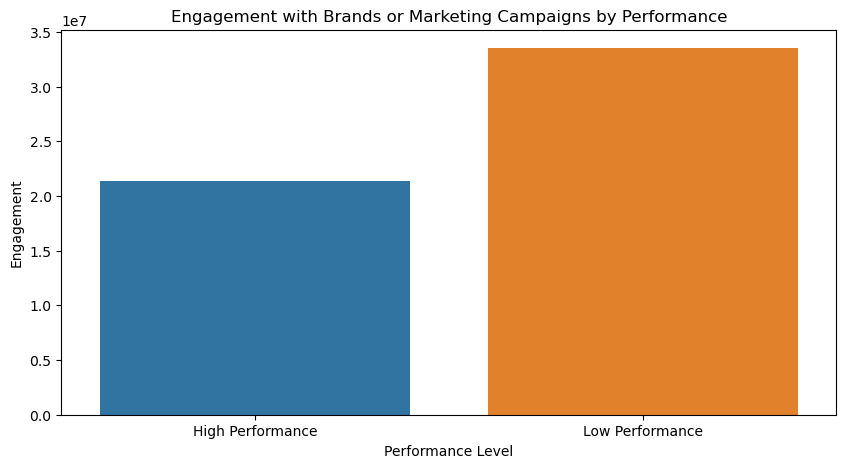

In [118]:
plt.figure(figsize=(10, 5))
sns.barplot(x=['High Performance', 'Low Performance'], y=[high_performance_engagement, low_performance_engagement])
plt.title('Engagement with Brands or Marketing Campaigns by Performance')
plt.xlabel('Performance Level')
plt.ylabel('Engagement')
plt.show()

In [120]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,IsDuplicate,HighPerformance,Engagement
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,False,False,2778.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,False,True,5318500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,False,False,24700.0
3,4,SETIndia,Unknown,162600000.0,India,15600.0,166.0,9.0,False,False,175.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,False,False,12400.0


# 7. Benchmarking

In [121]:
df['AboveAvgSubscribers'] = df['Suscribers'] > average_subscribers
df['AboveAvgVisits'] = df['Visits'] > average_visits
df['AboveAvgLikes'] = df['Likes'] > average_likes
df['AboveAvgComments'] = df['Comments'] > average_comments


In [123]:
top_performing_streamers = df[df['AboveAvgSubscribers'] & df['AboveAvgVisits'] & df['AboveAvgLikes'] & df['AboveAvgComments']]
print(top_performing_streamers)

     Rank               Username                     Categories   Suscribers  \
1       2                MrBeast             Videojuegos, Humor  183500000.0   
5       6              PewDiePie         Películas, Videojuegos  111500000.0   
26     27            dudeperfect                    Videojuegos   59700000.0   
34     35            TaylorSwift                 Música y baile   54100000.0   
39     40            JuegaGerman           Películas, Animación   48600000.0   
43     44               A4a4a4a4               Animación, Humor   47300000.0   
58     59              Mikecrack           Películas, Animación   43400000.0   
62     63         KimberlyLoaiza                 Música y baile   42100000.0   
64     65        luisitocomunica                        Unknown   41100000.0   
70     71            JessNoLimit           Películas, Animación   39600000.0   
96     97         TotalGaming093         Películas, Videojuegos   36300000.0   
98     99   TechnoGamerzOfficial        

# 8. Content Rcommendations

In [124]:
user_item_matrix = df.pivot_table(index='Username', columns='Categories', values='Suscribers', fill_value=0)
user_item_matrix

Categories,ASMR,"ASMR, Comida y bebida",Animación,"Animación, Humor","Animación, Humor, Juguetes","Animación, Juguetes","Animación, Videojuegos",Animales y mascotas,"Belleza, Moda",Ciencia y tecnología,...,"Películas, Animación","Películas, Humor","Películas, Juguetes","Películas, Videojuegos",Unknown,"Viajes, Espectáculos",Videojuegos,"Videojuegos, Humor","Videojuegos, Juguetes",Vlogs diarios
Username,,,,,,,,,,,,,,,,,,,,,
-genevievesplayhouse1465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123GOSpanish,0,0,13900000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123GO_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1MILLION_Dance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26300000,0,0,0,0,0
1theK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeetv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,72500000,0,0,0,0,0
zeetvtelugu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,14300000,0,0,0,0,0
zhong,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,31400000,0,0,0,0,0


In [125]:
cosine_sim = cosine_similarity(user_item_matrix)

In [126]:
def get_recommendations(username, cosine_sim=cosine_sim):
    idx = user_item_matrix.index.get_loc(username)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21] 
    streamer_indices = [i[0] for i in sim_scores]
    return user_item_matrix.index[streamer_indices]

In [127]:
recommended_streamers = get_recommendations('tseries')
print(recommended_streamers)

Index(['5MinuteCraftsDIY', '7clouds', 'AadishaktiFilms', 'AdexeyNau', 'Akon',
       'ArianaGrande', 'AvrilLavigne', 'BLACKPINK', 'BTS', 'BillieEilish',
       'BispoBrunoLeonardo', 'BlackEyedPeas', 'BollywoodClassics', 'CNCOMusic',
       'CalvinHarris', 'CalvinHarrisVEVO', 'ChainsmokersVEVO', 'ChrisBrownTV',
       'ConorMaynard', 'DJSnake'],
      dtype='object', name='Username')
